In [1]:
#Подключаем необходимые библиотеки
import sys
sys.path.append("..")

import math
import random

import matplotlib.pyplot as plt
import numpy as np

from nadaraya_watson import nadaraya_watson
from math_lib import sse, Kernel

In [2]:
# Генерируем данные для тренировки

# Вопросы
x = np.arange(1, 10, 0.1)
# Оригинальные ответы
y = np.zeros(x.size)
# Ответы с помехами
noise_y = np.zeros(x.size)

for i in range(y.size):
    y[i] = x[i]
    # Оригинальные ответы + шум
    noise_y[i] = x[i] + (math.sin(x[i]) * 4) * random.random() + (random.random() * 15 if random.random() < 0.20 else 0.)

[Gaussian K] Nadaraya-Watson, h='2.0'
SSE 394.8588434934743
[Quartic K] Nadaraya-Watson, h='4.0'
SSE 407.2816921758132


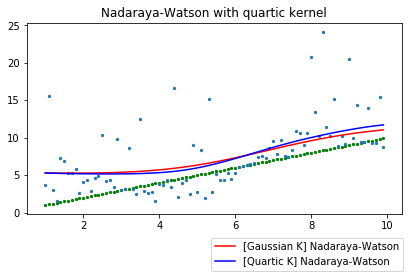

In [3]:
# Отображаем оригинальные данные и данные с помехами
plt.scatter(x, y, s=5, color='green')
plt.scatter(x, noise_y, s=5)

# Данные после алгоритма Надая Ватсона с исспользованием Гауссовского Ядра
h = 2.0 # Устанавливаем ширину окна
result = np.zeros(x.size)
for i in range(x.size):
    result[i] = nadaraya_watson(x[i], x, noise_y, h=h, kernel=Kernel.gaussian)

print("[Gaussian K] Nadaraya-Watson, h='%s'" % h)

# Вычисляем среднеквадратичную ошибку
print("SSE %r" % sse(y, result))
plt.plot(x, result, label='[Gaussian K] Nadaraya-Watson', color='red')

# Данные после алгоритма Надая Ватсона с исспользованием Квартического Ядра
h = 4.0 # Устанавливаем ширину окна
result2 = np.zeros(x.size)
for i in range(x.size):
    result2[i] = nadaraya_watson(x[i], x, noise_y, h=h, kernel=Kernel.quartic)

print("[Quartic K] Nadaraya-Watson, h='%s'" % h)

# Вычисляем среднеквадратичную ошибку
print("SSE %r" % sse(y, result2))
plt.plot(x, result2, label='[Quartic K] Nadaraya-Watson', color='blue')

plt.legend(bbox_to_anchor=(1.017, -0.1))
plt.tight_layout(pad=1.7)
plt.title("Nadaraya-Watson with quartic kernel")
plt.show()